Total Jobs Scraped: 46

Top Locations:
 Location
Not Specified    46
Name: count, dtype: int64

Most In-Demand Skills:
 [('', 46)]


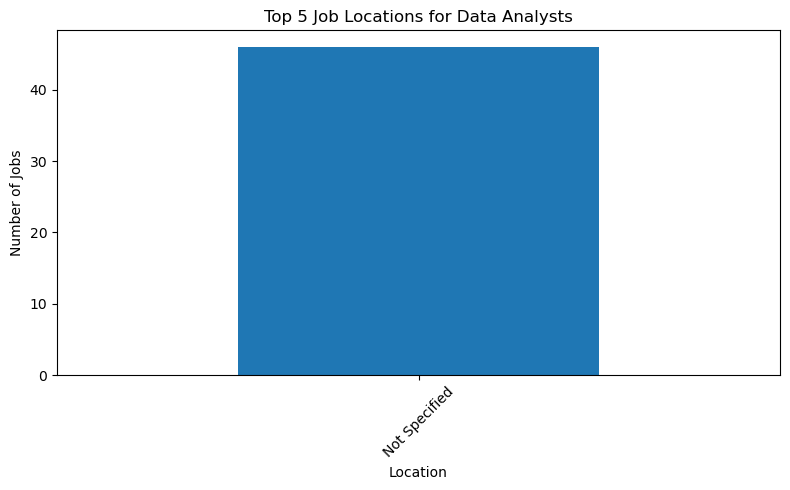

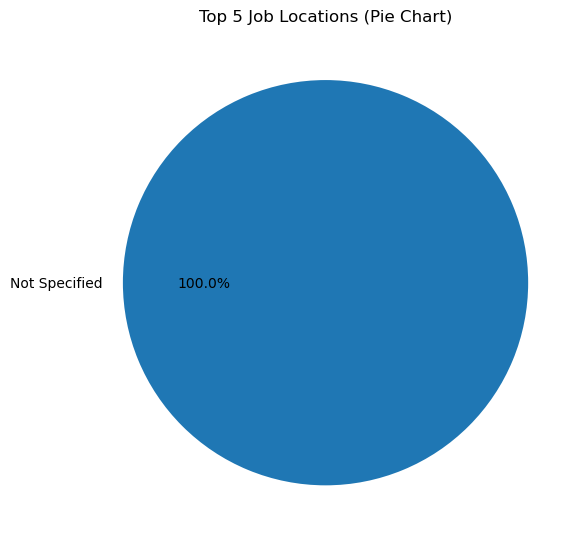


Analysis summary saved to README.md


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter
import time

# Step 1: URL and Request
url = "https://internshala.com/jobs/data-analyst-jobs"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)

soup = BeautifulSoup(response.text, "html.parser")

# Step 2: Extract Job Cards
jobs = soup.find_all("div", class_="individual_internship")

job_list = []

for job in jobs:
    try:
        title_tag = job.find("div", class_="heading_4_5 profile")
        title = title_tag.text.strip() if title_tag else "Not Specified"

        company_tag = job.find("div", class_="heading_6 company_name")
        company = company_tag.text.strip() if company_tag else "Not Specified"

        location_tag = job.find("a", class_="location_link")
        location = location_tag.text.strip() if location_tag else "Not Specified"

        skill_tags = job.find_all("div", class_="round_tabs")
        skills = [re.sub(r'\s+', ' ', s.text.strip().lower()) for s in skill_tags]

        job_list.append({
            "Title": title,
            "Company": company,
            "Location": location,
            "Skills": ", ".join(skills)
        })
    except Exception as e:
        print(f"⚠️ Skipping one job due to error: {e}")
    
    time.sleep(1)  # avoid getting blocked

# Step 3: Convert to DataFrame
df = pd.DataFrame(job_list)

if df.empty:
    print("⚠️ No jobs were scraped. Site structure might have changed.")
else:
    # Save CSV
    df.to_csv("jobs.csv", index=False)

    # Analysis
    print("Total Jobs Scraped:", len(df))

    top_locations = df['Location'].value_counts()
    print("\nTop Locations:\n", top_locations.head(5))

    all_skills = ", ".join(df['Skills']).split(", ")
    skill_counts = Counter(all_skills)
    print("\nMost In-Demand Skills:\n", skill_counts.most_common(10))

    # Visualization
    plt.figure(figsize=(8,5))
    top_locations.head(5).plot(kind='bar')
    plt.title("Top 5 Job Locations for Data Analysts")
    plt.xlabel("Location")
    plt.ylabel("Number of Jobs")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Optional Pie Chart
    plt.figure(figsize=(6,6))
    top_locations.head(5).plot(kind='pie', autopct='%1.1f%%')
    plt.title("Top 5 Job Locations (Pie Chart)")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

    # Save Summary for README
    summary = f"""
Summary of Job Listings Analysis
----------------------------------
Total Jobs Scraped: {len(df)}

Top 5 Locations:
{top_locations.head(5)}

Most In-Demand Skills:
{skill_counts.most_common(10)}

Challenges Faced:
- Some job listings did not have location or skills.
- Needed to add time.sleep() to avoid being blocked.
- Skills required regex cleaning to remove extra spaces.
- No salary data available on most jobs.
"""

    with open("README.md", "w") as f:
        f.write(summary)

    print("\nAnalysis summary saved to README.md")